# Data Analysis and Mining 2018/2019

## Project 1 - Regression Analysis

### Index


> - [a)](#a) Selecting two features in our dataset with more or less “linear‐like” scatterplot
- [b)](#b) Building a linear regression of one of the features over the other and obtaining a normal probability plot of the standardized residuals from this regression
- [c)](#c) Taking the natural log of the dependent variable, performing a linear regression on the transformed features and obtaining a normal probability plot of the standardized residuals from this regression
- [d)](#d) The population regression equation of our model
- [e)](#e) The correlation and determinacy coefficients
- [f)](#f) Testing the statistical hypothesis for determining whether a linear relationship exists between the chosen variables
- [g)](#g) Constructing and interpreting a 95% confidence interval for the unknown true slope of the regression line
- [i)](#i) Constructing and interpreting a 95% confidence interval for the mean of the y‐variable at a fixed value of our choice ($x_p = 105$) of the other variable
- [j)](#j) Constructing and interpreting a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed value of our choice ($x_p = 105$) of the other variable

### Setup
We will make use of the following Python libraries:

In [169]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Stats modules
import statsmodels.api as sm
import scipy.stats as stats

# Auxiliar libraries
from sklearn.metrics import r2_score

# Function to plot a scatter matrix
from pandas.plotting import scatter_matrix

# Functions for matrix operations
from numpy.linalg import inv
from numpy.linalg import det
from numpy import dot

import warnings
warnings.filterwarnings("ignore")

### Dataset Metadata

The dataset consists of several medical predictor variables and one target variable, Outcome. The predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

0. Pregnancies - Number of times pregnant
1. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
2. Blood Pressure - Diastolic blood pressure ($mm Hg$)
3. Skin Thickness - Triceps skin fold thickness ($mm$)
4. Insulin - 2-Hour serum insulin ($mu U/ml$)
5. BMI - Body mass index ($Kg/m^2$)
6. Diabetes Pedigree Function - Diabetes pedigree function
7. Age - Age (years)
8. Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

### Load dataset

In [170]:
!du -h diabetes.csv

 24K	diabetes.csv


In [171]:
!head -10 diabetes.csv

Having a small glance at the data file we can check that:  
    - The data fits in RAM
    - The data is structured, tabular and comma separated
    - There is a header row
    - No index column
    - The features are all numerical continous and numerical discrete
    - Some features have a high number of zeros (missing data)

In [172]:
# load the text file
data = pd.read_csv('diabetes.csv')
data.shape

(768, 9)

### Cleaning the data
We will clean our data by removing the patients that do not have information about their Glucose, Blood Pressure, Skin Thickness, Insulin and BMI. These missing values are represented by zeros.

In [173]:
# Removing patients with missing data
data = data[(data.Glucose!=0)
            & (data.BloodPressure !=0)
            & (data.SkinThickness !=0)
            & (data.Insulin !=0)
            & (data.BMI !=0)]

print('Data shape after cleaning: {0}'.format(data.shape))

Data shape after cleaning: (392, 9)


### Features to be analysed

We will plot a scatter matrix to see if any two features have a “linear‐like” scatterplot.

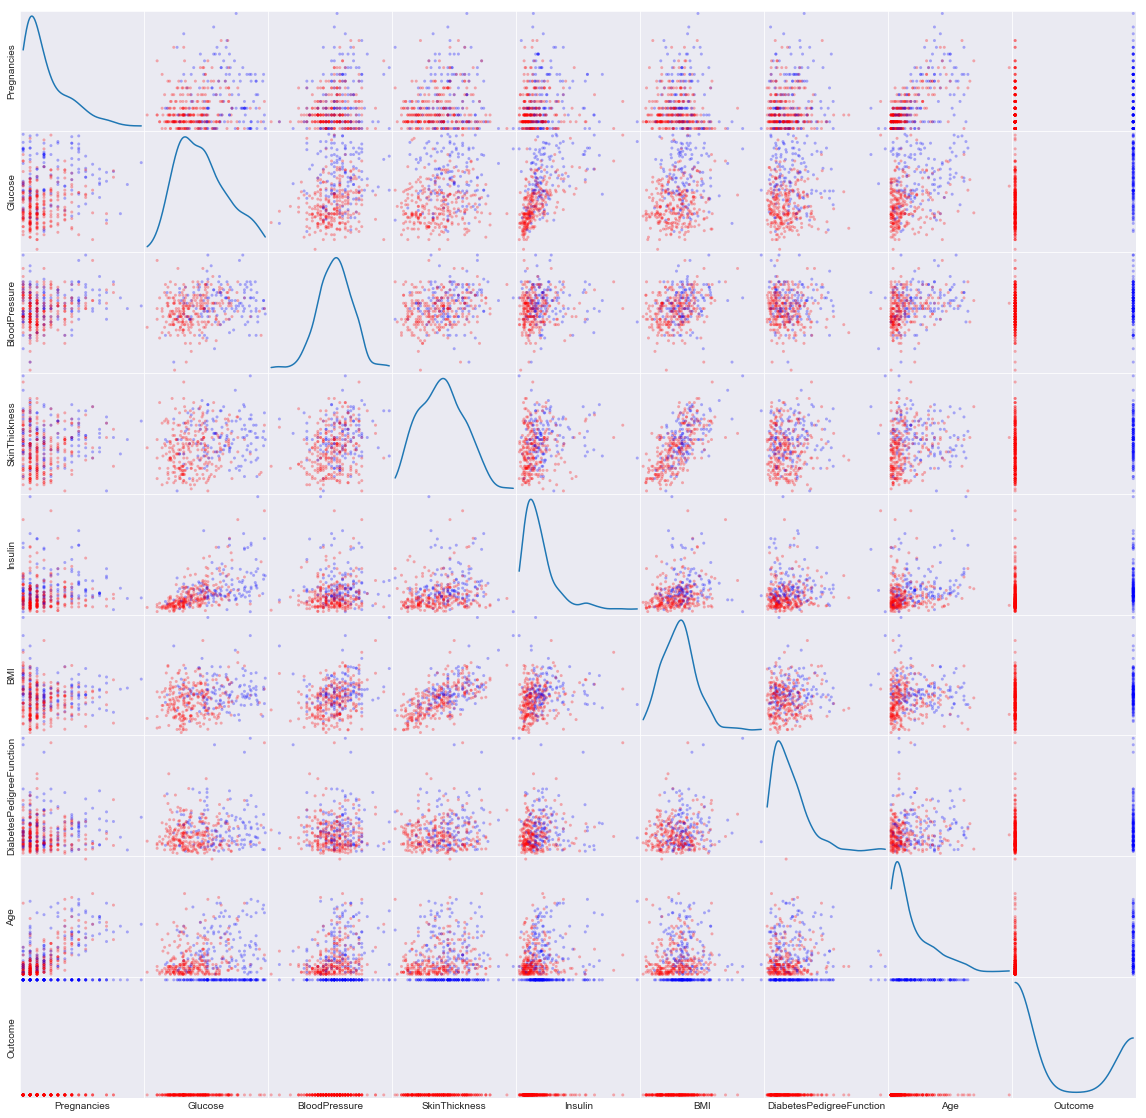

In [174]:
colors_palette = {0: "red", 1: "blue"}
colors = [colors_palette[c] for c in data.loc[:,'Outcome']] 

scatter_matrix = scatter_matrix(data, alpha=0.3, figsize=(20,20), grid=True, diagonal='kde', color=colors)
for subaxis in scatter_matrix:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.savefig('Images/Scatter Matrix.png', dpi=300)
plt.show()

<a id='a'></a>

## Selecting two features in our dataset with more or less “linear‐like” scatterplot

Analysing the scatter matrix we can see that the BMI and the Skin Thickness have a “linear‐like” scatterplot. So we will seek to model the relationship between the independent variable, the Skin Thickness, and the BMI (the dependent variable).

In [175]:
# It's easier to work with numpy arrays
if type(data) is not np.ndarray:
    data = data.to_numpy()
    
x = data[:,3:4] # Skin Thickness - Independent Variable
y = data[:,5] # BMI - Dependent Variable

print(x.shape, y.shape)

(392, 1) (392,)


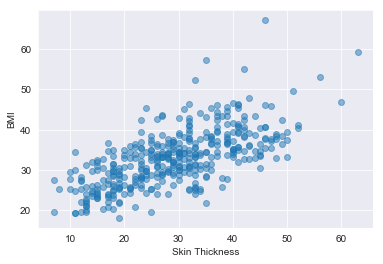

In [176]:
ax = sns.regplot(x=x, y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Skin Thickness', 
       ylabel='BMI');

The Scatter plot indicates positive linear relationship. There seems to be a few outliers when either the Skin Thickness or the BMI go above 50.

### Linear Regression
To model a linear relationship between one independent and dependent variable, we'll consider

$$Y = \beta_0 + \beta_1X$$

<a id='b'></a>

## Building a linear regression of one of the features over the other and obtaining a normal probability plot of the standardized residuals from this regression

In [177]:
constant_term = np.ones(len(x)) 

# append constant term as a column of x
if x.shape[1] < 2:
    x = np.c_[constant_term, x]

print(x[:5])

[[ 1. 23.]
 [ 1. 35.]
 [ 1. 32.]
 [ 1. 45.]
 [ 1. 23.]]


In [178]:
beta = np.linalg.lstsq(x, y)[0]
print('Estimated coefficients:', beta)

print('\nTo use the dot product function we have to state that the coefficients vector is of the shape (2,1)')
print('Old shape of coefficients array:',beta.shape)
beta = np.reshape(beta,(-1,1))
print('New shape of coefficients array:',beta.shape)

Estimated coefficients: [20.14686217  0.44395886]

To use the dot product function we have to state that the coefficients vector is of the shape (2,1)
Old shape of coefficients array: (2,)
New shape of coefficients array: (2, 1)


Doing Linear Regression with a library.

In [179]:
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     308.1
Date:                Sun, 28 Apr 2019   Prob (F-statistic):           2.96e-51
Time:                        20:41:02   Log-Likelihood:                -1205.9
No. Observations:                 392   AIC:                             2416.
Df Residuals:                     390   BIC:                             2424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1469      0.784     25.713      0.0

### Visualizing the estimator 
Plotting the actual values of y and the predicted values from the relationship $X\hat{\beta}$.

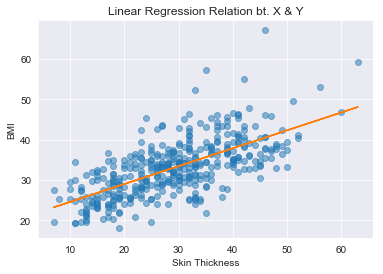

In [180]:
# compute new predictions
predictions = dot(x,beta) 

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Skin Thickness', 
       ylabel='BMI',
       title='Linear Regression Relation bt. X & Y');
plt.plot(x[:,1], predictions) # overlay a line plot over a scatter plot 
plt.savefig('Images/Linear Regression.png',dpi=300)
plt.show()

### Residuals and Goodness of Fit

In [181]:
### SSTotal
def ss_total(y):
    avg = sum(y)/len(y)
    return sum((y-avg)**2)

### SSResiduals & SSErrors
# Watch out for broadcast effects
# y shape is (209,) and predictions shape is (209,1)
# shapes have to agree when using element-wise operations in numpy


# The regression sum of squares, also called the explained sum of squares:
def ss_reg(pred, y):
    avg = sum(y)/len(y)
    # returns array for some reason. Access 1st position
    return sum((pred - avg)**2)[0]

# The sum of squares of residuals, also called the residual sum of squares:
def ss_res(pred, y):
    # reshape y from (209,) to (209,1)
    # returns array for some reason. Access 1st position
    return sum((np.reshape(y,(-1,1)) - pred)**2)[0]

# SStotal
sstotal = ss_total(y)

# We could also obtain SStotal using the target's variance
# don't forget to get an unbiased estimate of the variance 
ss_total_using_variance = (len(y) - 1 ) * np.var(y, ddof=1) 

# SSReg
ssreg = ss_reg(predictions, y)

# SSRes
ssres = ss_res(predictions, y)

### R^2
rsq_with_intercept = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy, model with intercept:', np.round(rsq_with_intercept,2))

SStotal: 19310.7056
SSreg: 8523.1157
SSres: 10787.5899
Coefficient of Determinacy, model with intercept: 0.44


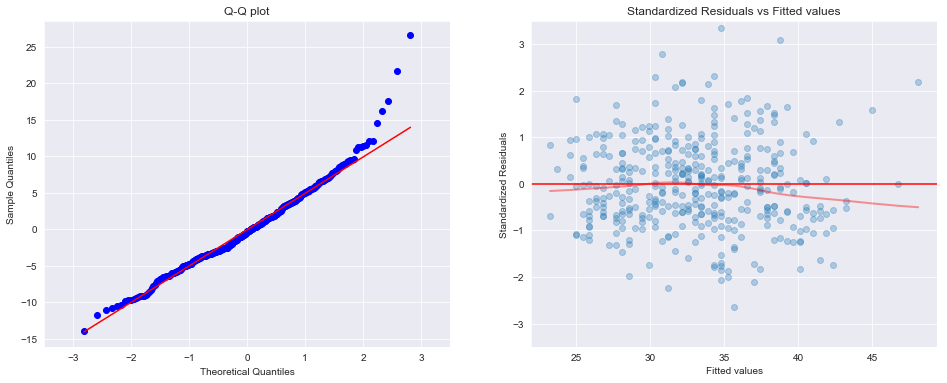

In [182]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x,beta)
residuals = y - predictions[:,0]
degrees_of_freedom = len(y) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)

# s = √MSE = √(SSE/(n−m−1))
# standard error of the estimate = residuals standard error
s = residuals_standard_error = np.sqrt(ssres / degrees_of_freedom)

mean_independent_variable = sum(x[:,1]) / len(x[:,1])

leverage = (1 / len(x[:,1])) + (x[:,1] - mean_independent_variable)**2 / sum((x[:,1] - mean_independent_variable)**2)

standardized_rediduals = (y - predictions[:,0]) / (residuals_standard_error * np.sqrt(1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
axs[1].axhline(0,color='r')
axs[1].set_ylim(-3.5,3.5)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values')
plt.savefig('Images/Q-Q plot and Standardized Residuals vs Fitted values', dpi=300)

Almost all of our data lines up nicely along the straight line, although the left tail deviates slightly and the right tail deviates a considerable amount. There are around 13 outliers and there's left skewness.
The probability plot indicates acceptable normality and is left skewed. The Normality assumption is valid.

### Feature Engineering

Doing regression analysis with a Log transformation on the dependent variable.

<a id='c'></a>

## Taking the natural log of the dependent variable, performing a linear regression on the transformed features and obtaining a normal probability plot of the standardized residuals from this regression

In [183]:
# Unnecessary since we already removed the patients with Skin Thickness or BMI = 0
mask = y != 0
y_masked = y[mask]
x_masked = x[mask]
y_masked = np.log(y_masked)
beta = np.linalg.lstsq(x_masked, y_masked)[0]
beta = np.reshape(beta,(-1,1))
print('Estimated coefficients:', beta[:,0])

Estimated coefficients: [3.08276174 0.01352416]


Estimated coefficients: [3.08276174 0.01352416]


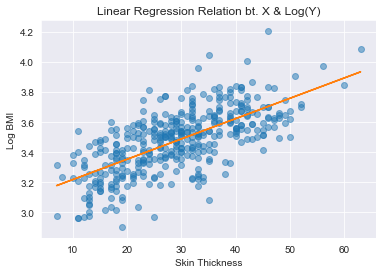

In [184]:
# estimate the coefficients
beta = np.linalg.lstsq(x_masked, y_masked)[0]
print('Estimated coefficients:', beta)
beta = np.reshape(beta,(-1,1))

# compute new predictions
predictions = dot(x_masked,beta) 

ax = sns.regplot(x=x_masked[:,1], y=y_masked, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Skin Thickness', 
       ylabel='Log BMI',
       title='Linear Regression Relation bt. X & Log(Y)');
plt.plot(x_masked[:,1], predictions) # overlay a line plot over a scatter plot
plt.show()

In [185]:
# SStotal
sstotal = ss_total(y_masked)

# SSReg
ssreg = ss_reg(predictions, y_masked)

# SSRes
ssres = ss_res(predictions, y_masked)

### R^2
rsq = 1 - (ssres / sstotal)

print('SStotal:', round(sstotal,4))
print('SSreg:', round(ssreg,4))
print('SSres:', round(ssres,4))
print('Coefficient of Determinacy:', np.round(rsq,2))

SStotal: 17.5061
SSreg: 7.9092
SSres: 9.5969
Coefficient of Determinacy: 0.45


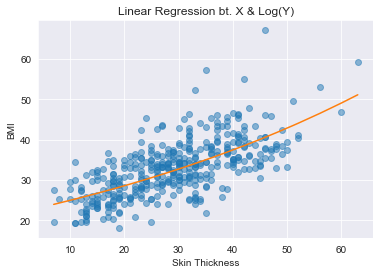

In [186]:
# compute new predictions
predictions = np.exp(dot(x_masked,beta)) 

# order the data first
temp = np.c_[x[:,1], predictions]
# sort by first column
temp = temp[temp[:,0].argsort()]

ax = sns.regplot(x=x[:,1], y=y, fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Skin Thickness', 
       ylabel='BMI',
       title='Linear Regression bt. X & Log(Y)');

# Remeber that the instruction plot 
plt.plot(temp[:,0], temp[:,1]) # overlay a line plot over a scatter plot
plt.savefig('Images/Linear Regression with Log(Y).png',dpi=300)
plt.show()

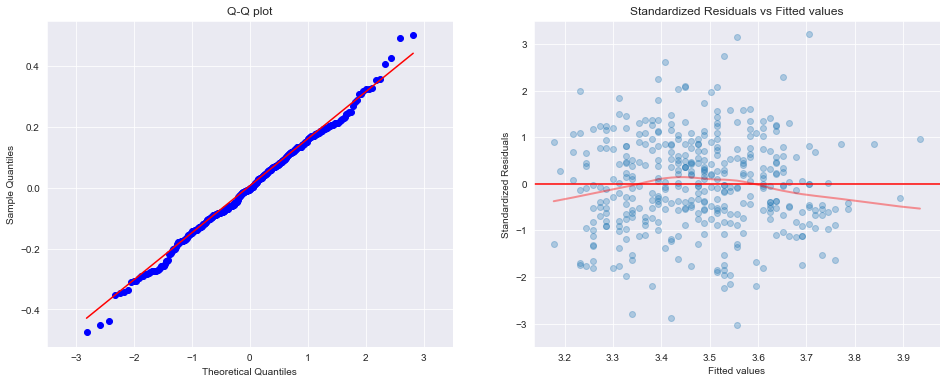

In [187]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
predictions = dot(x_masked,beta)
residuals = y_masked - predictions[:,0]
degrees_of_freedom = len(x_masked) - x.shape[1]

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'Q-Q plot')
axs[0].set_xlim(-3.5,3.5)


residuals_standard_error = np.sqrt(ssres / degrees_of_freedom)
mean_independent_variable = sum(x_masked[:,1]) / len(x_masked[:,1])
leverage = (1 / len(x_masked[:,1])) + (x_masked[:,1] - mean_independent_variable)**2 / sum((x_masked[:,1] - mean_independent_variable)**2)
standardized_rediduals = (y_masked - predictions[:,0]) / (residuals_standard_error * np.sqrt(1 - leverage))

sns.regplot(x=predictions[:,0], 
            y=standardized_rediduals, 
            ax=axs[1],
            lowess=True, 
            scatter_kws={'alpha':0.3}, 
            line_kws={"color":"r","alpha":0.4,"lw":2})
axs[1].axhline(0,color='r')
axs[1].set_ylim(-3.5,3.5)
axs[1].set(ylabel='Standardized Residuals', 
           xlabel='Fitted values');
axs[1].set_title(label = 'Standardized Residuals vs Fitted values');
plt.savefig('Images/Q-Q plot and Standardized Residuals vs Fitted values Log(y)',dpi=300)

The tails slightly deviate from the straight line having 7 outliers.
The probability plot indicates acceptable normality and slight left and right skewness.

In [188]:
# Recover old values
predictions = dot(x,beta)
residuals = y - predictions[:,0]
degrees_of_freedom = len(x) - x.shape[1]
beta = np.linalg.lstsq(x, y)[0]
# To use the dot product function we have to state that the coefficients vector is of the shape (2,1)
beta = np.reshape(beta,(-1,1))


print('x range: [{0}, {1}], y range: [{2}, {3}]'.format(np.min(x),np.max(x),np.min(y),np.max(y)))

x range: [1.0, 63.0], y range: [18.2, 67.1]


<a id="d"></a>

## The population regression equation of our model

### Population Regression Equation

${ BMI = 20.14686217 + 0.44395886 \cdot SkinThickness}$ + ε

This means that for example a Pima Indian woman with a skin thickness of ${30mm}$ has estimated 20.14686217 + 0.44395886(30) = 33.46562797 roughtly a BMI of 33 ${kg/m^2}$

<a id='e'></a>

## The correlation and determinacy coefficients

In [189]:
print('Coefficient of Determinacy:', np.round(results.rsquared,2))
print('Correlation:',round(np.corrcoef(y_masked,x_masked[:,1])[0,1],2))

Coefficient of Determinacy: 0.44
Correlation: 0.67


The Coefficient of Determinacy has a low score of 0.44 indicating that the regression line isn't useful for making predictions.<br>
The Correlation Coefficient (0.67) is positive indicating that the variables are positively correlated.

### T-test for Relationship bt x and y

H0: asserts β1 = 0 (no linear relationship exists) <br>
Ha: asserts β1 ≠ 0 (linear relationship exists)

<a id='f'></a>

## Testing the statistical hypothesis for determining whether a linear relationship exists between the chosen variables

In [190]:
expected_value = 0.0

# For each coefficient
for i in range(len(beta)):
    ttest = results.tvalues[i]

    #Degrees of freedom
    df = x_masked.shape[0] - (i+1)
    # https://stats.stackexchange.com/a/140395
    
    pval = stats.t.sf(np.abs(ttest), df)*2  # two-sided pvalue = Prob(abs(t)>tt)
    # https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test


    print('Test statistc for coefficient estimate ',i,':',ttest,'| P-value:', np.round(pval,8))

Test statistc for coefficient estimate  0 : 25.712888384584428 | P-value: 0.0
Test statistc for coefficient estimate  1 : 17.553724658425693 | P-value: 0.0


T-test rejects Ho when p-value small. <br>
0.05 used as rejection threshold. <br>
**Because p-value ~ 0.000, we reject H0.** <br>
This indicates that a linear relationship exists between Skin Thickness and Body Mass Index.

<a id='g'></a>

## Constructing and interpreting a 95% confidence interval for the unknown true slope of the regression line

In [191]:
df = len(x) - 2
alpha = .05 / 2 # Two-tail test
one_minus_alpha = 1 - alpha
t_student_values = stats.t.ppf( [alpha,one_minus_alpha], df)
stde = results.params + t_student_values * results.bse,results.params - t_student_values * results.bse
stde = np.array([[stde[0][0],stde[1][0]],[stde[1][1],stde[0][1]]])

print('β0 = {0}\nβ1 = {1}'.format(np.round(stde[0],4),np.round(stde[1],4)))

β0 = [18.6064 21.6873]
β1 = [0.3942 0.4937]


Confidence interval equals = [0.3942, 0.4937]

95% confident true slope of regression line lies between 0.3942 and 0.4937

For each additional millimeter of Skin Thickness, the Body Mass Index ($kg/m^2$) increases between 0.3942 and 0.4937 points.

Since β1 = 0 is not contained in (0.3942, 0.4937), we are 95% confident of significance in linear relationship between Skin Thickness and BMI.

<a id='i'></a>

## Constructing and interpreting a 95% confidence interval for the mean of the y‐variable at a fixed value of our choice of the other variable ($x_{p=105} = 30$)

In [192]:
df = len(x) - 2
alpha = .05 / 2 # Two-tail test
one_minus_alpha = 1 - alpha
t_student_values = stats.t.ppf( [alpha,one_minus_alpha], df)
stde = predictions + t_student_values * s * np.sqrt((1/len(x))+(((x-mean_independent_variable)**2)/sum((x-mean_independent_variable)**2)))

xp = 105

print('For xp = {0} yp = {1}, ȳ = {2}'.format(x[xp,1],y[xp],np.round(stde[xp],4)))

For xp = 30.0 yp = 30.0, ȳ = [2.7499 4.0125]


We're 95% confident that the  mean Body Mass Index of all Pima women with a Skin Thickness of 30$mm$, lies between 32.727 and 33.9896 $kg/m^2$.

<a id='j'></a>

## Constructing and interpreting a 95% confidence interval for a randomly chosen value of the y‐variable at a fixed value of our choice of the other variable ($x_{p=105} = 30$)

In [193]:
df = len(x) - 2
alpha = .05 / 2 # Two-tail test
one_minus_alpha = 1 - alpha
t_student_values = stats.t.ppf( [alpha,one_minus_alpha], df)
stde = predictions + t_student_values * s * np.sqrt(1+(1/len(x))+(((x-mean_independent_variable)**2)/sum((x-mean_independent_variable)**2)))

xp = 105

print('For xp = {0} with yp = {1}, ȳ = {2}'.format(x[xp,1],y[xp],np.round(stde[xp],4)))

For xp = 30.0 with yp = 30.0, ȳ = [-6.878  13.8419]


We're 95% confident that the Body Mass Index of a randomly selected Pima Woman with a Skin Thickness of 30$mm$, lies between 23.0991 and 43.8191 $kg/m^2$.

This is a very wide interval containing values that represent very different Pima women ranging from the healthy weight range to the obese range.

According to the UK's __[NHS](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/)__:
> Below 18.5 – you're in the underweight range <br>
 Between 18.5 and 24.9 – you're in the healthy weight range<br>
 Between 25 and 29.9 – you're in the overweight range<br>
 Between 30 and 39.9 – you're in the obese range 

For this reason we consider that this prediction interval is not useful.